<a href="https://colab.research.google.com/github/IlliaVodolieievTI-01/PHP-projects/blob/main/Content_based_ReccSys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Імпортуємо необхідні бібліотеки та дані

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Зчитуємо дані про рейтинг фільмів з нашого csv файлу
df_ratings = pd.read_csv('drive/MyDrive/Films/title.ratings.tsv',
                   sep='\t',
                   dtype={'averageRating': 'float32', 'numVotes': 'uint32'})

In [ ]:
df_ratings.head(10)

,tconst,averageRating,numVotes
0,tt0000001,5.7,2052
1,tt0000002,5.7,275
2,tt0000003,6.5,2007
3,tt0000004,5.4,179
4,tt0000005,6.2,2771
5,tt0000006,5.1,185
6,tt0000007,5.4,858
7,tt0000008,5.4,2194
8,tt0000009,5.4,211
9,tt0000010,6.8,7554


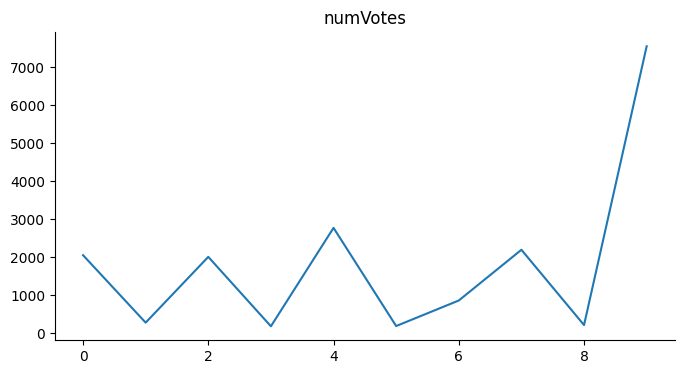

In [ ]:
from matplotlib import pyplot as plt
df_ratings[:10]['numVotes'].plot(kind='line', figsize=(8, 4), title='numVotes')
plt.gca().spines[['top', 'right']].set_visible(False)

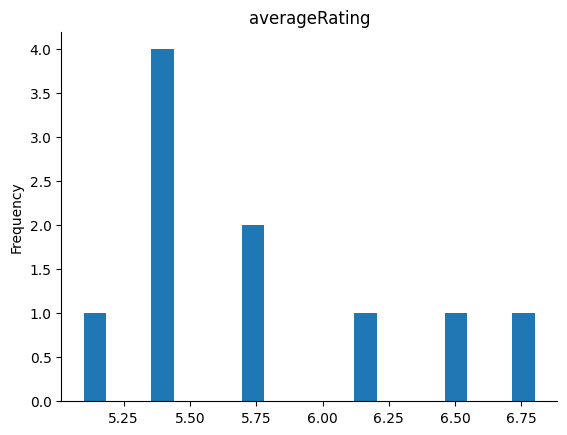

In [ ]:
from matplotlib import pyplot as plt
df_ratings[:10]['averageRating'].plot(kind='hist', bins=20, title='averageRating')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#Зчитуємо основні дані про фільми (назва, рік випуску, жанр, тощо)
df_basics = pd.read_csv('drive/MyDrive/Films/title.basics.tsv',
                        sep='\t',
                        dtype={'tconst': 'object',
                               'titleType': 'object',
                               'primaryTitle': 'object',
                               'originalTitle': 'object',
                               'isAdult': 'float64',
                               'startYear': 'object',
                               'endYear': 'object',
                               'runtimeMinutes': 'object',
                               'genres': 'object'},
                        na_values='\\N')

In [ ]:
df_basics.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0.0,1894,NaN,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892,NaN,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0.0,1892,NaN,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0.0,1892,NaN,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0.0,1893,NaN,1,"Comedy,Short"
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0.0,1894,NaN,1,Short
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0.0,1894,NaN,1,"Short,Sport"
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0.0,1894,NaN,1,"Documentary,Short"
8,tt0000009,movie,Miss Jerry,Miss Jerry,0.0,1894,NaN,45,Romance
9,tt0000010,short,Leaving the Factory,La sortie de l'usine Lumière à Lyon,0.0,1895,NaN,1,"Documentary,Short"


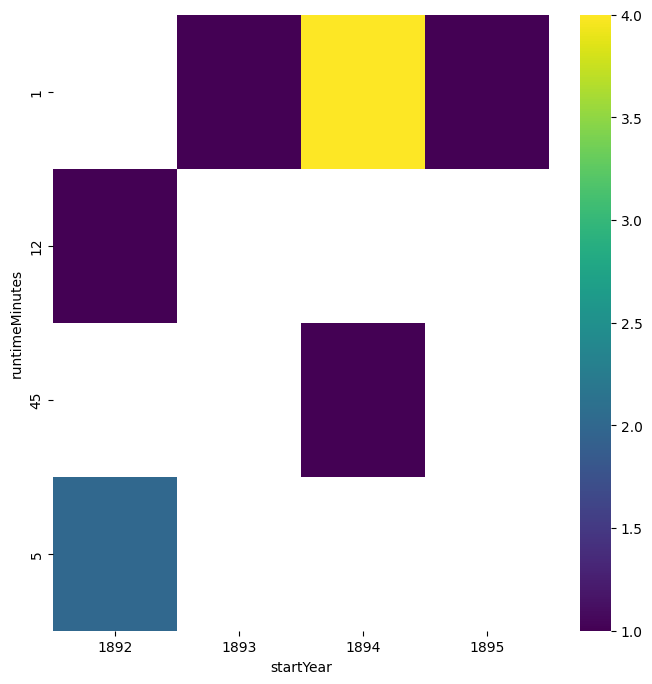

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['runtimeMinutes'].value_counts()
    for x_label, grp in df_basics[:10].groupby('startYear')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('startYear')
_ = plt.ylabel('runtimeMinutes')

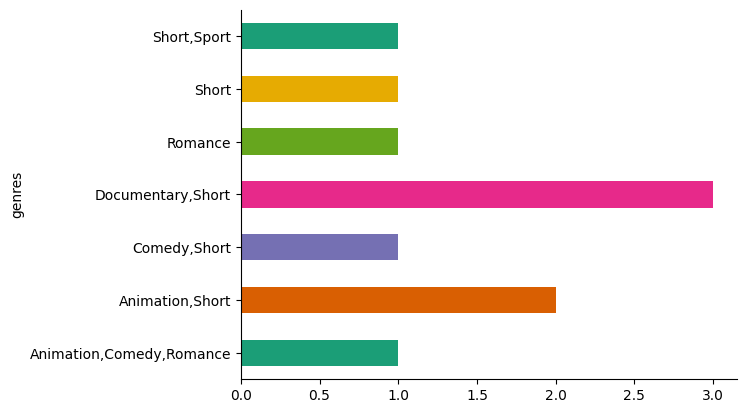

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df_basics[:10].groupby('genres').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#Об'єднуємо дві таблиці в одну, з якою будемо безпосередньо працювати
#Операція merge в pandas прирівнюється до операції join в SQL
df = pd.merge(df_basics, df_ratings, on='tconst', how='outer')

In [ ]:
df = df[:10000]

In [ ]:
df.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0.0,1894,NaN,1,"Documentary,Short",5.7,2052.0
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892,NaN,5,"Animation,Short",5.7,275.0
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0.0,1892,NaN,5,"Animation,Comedy,Romance",6.5,2007.0
3,tt0000004,short,Un bon bock,Un bon bock,0.0,1892,NaN,12,"Animation,Short",5.4,179.0
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0.0,1893,NaN,1,"Comedy,Short",6.2,2771.0
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0.0,1894,NaN,1,Short,5.1,185.0
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0.0,1894,NaN,1,"Short,Sport",5.4,858.0
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0.0,1894,NaN,1,"Documentary,Short",5.4,2194.0
8,tt0000009,movie,Miss Jerry,Miss Jerry,0.0,1894,NaN,45,Romance,5.4,211.0
9,tt0000010,short,Leaving the Factory,La sortie de l'usine Lumière à Lyon,0.0,1895,NaN,1,"Documentary,Short",6.8,7554.0


#Препроцесінг даних

In [ ]:
#Переглянемо типи даних наших колонок
df.dtypes

tconst             object
titleType          object
primaryTitle       object
originalTitle      object
isAdult           float64
startYear          object
endYear            object
runtimeMinutes     object
genres             object
averageRating     float32
numVotes          float64
dtype: object

In [ ]:
#Переглянемо кількість рядків з нульовими значеннями
df.isnull().sum()

tconst                0
titleType             0
primaryTitle          0
originalTitle         0
isAdult               0
startYear             1
endYear           10000
runtimeMinutes     4923
genres              565
averageRating      7070
numVotes           7070
dtype: int64

In [ ]:
# Видаляємо рядки, де рік випуску фільму відсутній
df.dropna(subset=['startYear'], inplace=True)

#Для року закінчення, значення якого відсутнє, використовуємо рік випуску
df['endYear'] = df['endYear'].fillna(df['startYear'])

In [ ]:
#Видаляємо колонки з пустими значеннями, адже в них не вистачає релевантних даних
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
#Конвертуємо колонку року випуску в uint16, для заощадження пам'яті
df['startYear'] = df['startYear'].astype('uint16')

#Конвертуємо тривалість в числове значення та позбуваємось нерелевантних даних
df['runtimeMinutes'] = pd.to_numeric(df['runtimeMinutes'], errors='coerce').astype('uint32')

#Конвертуємо кількість голосів в uint32, для заощадження пам'яті
df['numVotes'] = df['numVotes'].astype('uint32')

In [ ]:
#Конвертуємо показник фільму з дорослим рейтингом в тип bool
#Значення в колонці бувають лише 1 - для дорослих фільмів, і 0 - для всіх інших.
#Дані простіше зберігати та інтерпретувати за допомогою True/False
df['isAdult'] = df['isAdult'].astype(bool)

In [ ]:
df

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,False,1894,1894,1,"Documentary,Short",5.7,2052
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,False,1892,1892,5,"Animation,Short",5.7,275
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,False,1892,1892,5,"Animation,Comedy,Romance",6.5,2007
3,tt0000004,short,Un bon bock,Un bon bock,False,1892,1892,12,"Animation,Short",5.4,179
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,False,1893,1893,1,"Comedy,Short",6.2,2771
...,...,...,...,...,...,...,...,...,...,...,...
2220,tt0010120,short,The Fighting Brothers,The Fighting Brothers,False,1919,1919,20,"Short,Western",3.9,43
2221,tt0010128,short,Fireman Save My Child,Fireman Save My Child,False,1919,1919,5,"Animation,Comedy,Short",5.6,72
2222,tt0010131,movie,Fit to Win,Fit to Win,False,1919,1919,60,Drama,5.3,22
2223,tt0010133,movie,The Follies Girl,The Follies Girl,False,1919,1919,50,Comedy,4.2,22


In [ ]:
#Переконуємось, чи не залишилось у нас пустих значень
df.isnull().sum()

tconst            0
titleType         0
primaryTitle      0
originalTitle     0
isAdult           0
startYear         0
endYear           0
runtimeMinutes    0
genres            0
averageRating     0
numVotes          0
dtype: int64

#Готуємо дані для тренування

In [ ]:
df.dtypes

tconst             object
titleType          object
primaryTitle       object
originalTitle      object
isAdult              bool
startYear          uint16
endYear            object
runtimeMinutes     uint32
genres             object
averageRating     float32
numVotes           uint32
dtype: object

In [ ]:
training_columns = ['originalTitle', 'titleType', 'isAdult', 'startYear', 'endYear', 'genres', 'runtimeMinutes', 'averageRating', 'numVotes']

In [ ]:
X = df[training_columns].copy()

In [ ]:
X

,originalTitle,titleType,isAdult,startYear,endYear,genres,runtimeMinutes,averageRating,numVotes
0,Carmencita,short,False,1894,1894,"Documentary,Short",1,5.7,2052
1,Le clown et ses chiens,short,False,1892,1892,"Animation,Short",5,5.7,275
2,Pauvre Pierrot,short,False,1892,1892,"Animation,Comedy,Romance",5,6.5,2007
3,Un bon bock,short,False,1892,1892,"Animation,Short",12,5.4,179
4,Blacksmith Scene,short,False,1893,1893,"Comedy,Short",1,6.2,2771
...,...,...,...,...,...,...,...,...,...
2220,The Fighting Brothers,short,False,1919,1919,"Short,Western",20,3.9,43
2221,Fireman Save My Child,short,False,1919,1919,"Animation,Comedy,Short",5,5.6,72
2222,Fit to Win,movie,False,1919,1919,Drama,60,5.3,22
2223,The Follies Girl,movie,False,1919,1919,Comedy,50,4.2,22


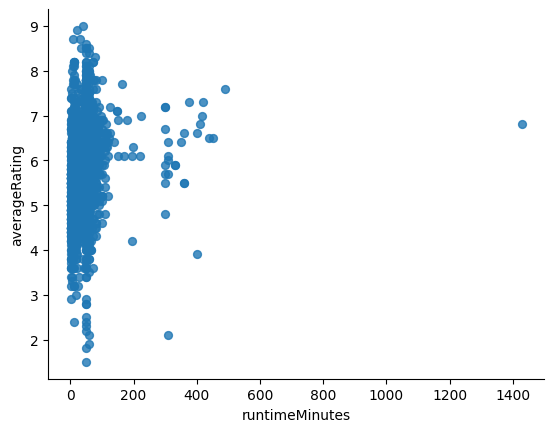

In [ ]:
from matplotlib import pyplot as plt
X.plot(kind='scatter', x='runtimeMinutes', y='averageRating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
features_combined = X.apply(lambda row: ' '.join(map(str, row)), axis=1)

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(features_combined)

In [ ]:
from sklearn.cluster import KMeans

# Create KMeans model
kmeans = KMeans(n_clusters=6, random_state=42, n_init = 10)

# Fit KMeans to the TF-IDF matrix
kmeans.fit(tfidf_matrix)

KMeans(n_clusters=6, n_init=10, random_state=42)

In [ ]:
# Get the cluster labels for each document
cluster_labels = kmeans.labels_

# Print the cluster labels
print("Cluster labels:", cluster_labels)

Cluster labels: [3 3 3 ... 5 5 5]


In [ ]:
X['cluster'] = cluster_labels

In [ ]:
X

,originalTitle,titleType,isAdult,startYear,endYear,genres,runtimeMinutes,averageRating,numVotes,cluster
0,Carmencita,short,False,1894,1894,"Documentary,Short",1,5.7,2052,3
1,Le clown et ses chiens,short,False,1892,1892,"Animation,Short",5,5.7,275,3
2,Pauvre Pierrot,short,False,1892,1892,"Animation,Comedy,Romance",5,6.5,2007,3
3,Un bon bock,short,False,1892,1892,"Animation,Short",12,5.4,179,3
4,Blacksmith Scene,short,False,1893,1893,"Comedy,Short",1,6.2,2771,3
...,...,...,...,...,...,...,...,...,...,...
2220,The Fighting Brothers,short,False,1919,1919,"Short,Western",20,3.9,43,3
2221,Fireman Save My Child,short,False,1919,1919,"Animation,Comedy,Short",5,5.6,72,3
2222,Fit to Win,movie,False,1919,1919,Drama,60,5.3,22,5
2223,The Follies Girl,movie,False,1919,1919,Comedy,50,4.2,22,5


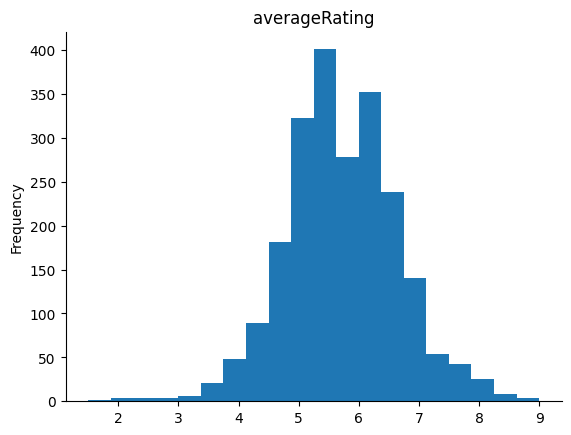

In [ ]:
from matplotlib import pyplot as plt
X['averageRating'].plot(kind='hist', bins=20, title='averageRating')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
movie = 'Blacksmith Scene'

In [ ]:
movie_cluster = X.loc[X.originalTitle == movie].cluster.item()

In [ ]:
cluster_df = X.loc[X.cluster == movie_cluster]

In [ ]:
cluster_indexes = np.array(cluster_df.index)

In [ ]:
cluster_values = tfidf_matrix[cluster_indexes]

In [ ]:
euclidean_distance = euclidean_distances(cluster_values)

In [ ]:
similarity_df = pd.DataFrame(euclidean_distance, index=cluster_df['originalTitle'], columns=cluster_df['originalTitle'])

In [ ]:
max = similarity_df.values.max()

In [ ]:
max


1.4132478464040543

In [ ]:
similarity_df

originalTitle,Carmencita,Le clown et ses chiens,Pauvre Pierrot,Un bon bock,Blacksmith Scene,Chinese Opium Den,Corbett and Courtney Before the Kinetograph,Edison Kinetoscopic Record of a Sneeze,Miss Jerry,La sortie de l'usine Lumière à Lyon,...,Chop Suey & Co.,The Clown's Pups,Count Your Change,Count the Votes,A Day's Pleasure,The Deadlier Sex,The Desert Rat,Don't Shove,The Fighting Brothers,Fireman Save My Child
originalTitle,,,,,,,,,,,,,,,,,,,,,
Carmencita,0.000000,1.378686,1.404584,1.397552,1.396997,1.006575,1.065696,1.016204,1.020923,1.364041,...,1.367944,1.364388,1.392341,1.390501,1.391938,1.412375,1.391241,1.363379,1.392458,1.393781
Le clown et ses chiens,1.378686,0.000000,1.017939,1.032661,1.400486,1.400013,1.401784,1.401626,1.412743,1.401359,...,1.377398,1.233063,1.396778,1.395315,1.396458,1.412746,1.395903,1.373780,1.396872,1.364399
Pauvre Pierrot,1.404584,1.017939,0.000000,0.988360,1.398666,1.405496,1.406581,1.406485,1.394613,1.406321,...,1.395803,1.354047,1.394464,1.392805,1.394101,1.405141,1.402979,1.394006,1.403572,1.358237
Un bon bock,1.397552,1.032661,0.988360,0.000000,1.399636,1.399134,1.385905,1.385544,1.395242,1.400564,...,1.396952,1.357314,1.359959,1.331564,1.395357,1.412656,1.394768,1.395269,1.395797,1.361272
Blacksmith Scene,1.396997,1.400486,1.398666,1.399636,0.000000,1.398632,1.400576,1.400403,1.412601,1.400110,...,1.388041,1.386046,1.386133,1.383766,1.385614,1.405298,1.394120,1.385480,1.395184,1.387986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Deadlier Sex,1.412375,1.412746,1.405141,1.412656,1.405298,1.412549,1.407400,1.412737,1.406005,1.412706,...,1.403660,1.395279,1.402895,1.393752,1.379552,0.000000,1.404185,1.402634,1.404714,1.382433
The Desert Rat,1.391241,1.395903,1.402979,1.394768,1.394120,1.393426,1.389141,1.395792,1.412065,1.395401,...,1.208050,1.179687,1.191788,1.158859,1.187336,1.404185,0.000000,1.186180,1.141971,1.207586
Don't Shove,1.363379,1.373780,1.394006,1.395269,1.385480,1.393962,1.396492,1.396267,1.412120,1.395886,...,1.167005,1.146187,1.184441,1.163237,1.179827,1.402634,1.186180,0.000000,1.199249,1.200811


In [ ]:
movie = 'Blacksmith Scene'

In [ ]:
movie_index = similarity_df.index.get_loc(movie)

# Get the top 10 most similar movies to the movie
top_10 = similarity_df.iloc[movie_index].sort_values(ascending=False)[1:11]

# Print the top 10 most similar movies to the movie
print(f'Top 10 similar movies to {movie}:\n')
top_10_percentage = round((top_10 / max) * 100, 3)
top_10_percentage_str = top_10_percentage.astype(str) + '%'
print(top_10_percentage_str)

Top 10 similar movies to Blacksmith Scene:

originalTitle
The Story of the Kelly Gang              99.962%
Gli ultimi giorni di Pompei               99.96%
Die Brüder Karamasoff                    99.958%
Dødsspring til hest fra cirkuskuplen     99.957%
Der Student von Prag                     99.956%
Le mort qui tue                          99.955%
Miss Jerry                               99.954%
Fantômas - À l'ombre de la guillotine    99.954%
Sweet Nell of Old Drury                  99.953%
The Count of Monte Cristo                 99.95%
Name: Blacksmith Scene, dtype: object
